Overview

Business Understanding
    Include stakeholder and key business questions

Data Understanding and Analysis
    Source of data

Description of data
    Three visualizations (the same visualizations presented in the slides and notebook)

Conclusion
    Summary of conclusions including three relevant findings

Outline From https://github.com/learn-co-curriculum/dsc-project-template/tree/example-aab

### Overview
For this project, you will use exploratory data analysis to generate insights for a business stakeholder.



### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. 
You are charged with exploring what types of films are currently doing the best at the box office. 
You must then translate those findings into actionable insights that the head of Microsoft's new movie studio 
can use to help decide what type of films to create.

### Data
1. directors influence the performance of the movie
    profit of each directors
    not median bc of how long they have been directing
    mean can be 
2. genres to go into
    look at directors that do well in these genres
3. 

### Methods
- standard for performance = high imdb score and ticket sales
- directros 


### Results

### Conclusions

#maybe
### Next Step

### Repository structure

### Thank you

In [5]:
### IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

### DATAFRAME DEFINITIONS
# define all dataframes for later
gross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
movies_df = pd.read_csv('data/tmdb.movies.csv.gz')
budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
# tsv files have to be read with \t (tab spcaes) as their delimiter
info_df = pd.read_csv('data/rt.movie_info.tsv.gz',delimiter='\t')
# file has an issue with encoding, read as cp850 or it throws an error
reviews_df = pd.read_csv('data/rt.reviews.tsv.gz', delimiter='\t', encoding='cp850')

In [6]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [ ]:
!ls data

In [7]:
#################################
# REQUIRES UNZIPPING data/zipped_files/im.db.zip
# INTO DIRECOTRY data/unzipped AS im.db
#################################
conn = sqlite3.connect('data/im.db')
# call this later => imdb_df = pd.read_sql('''<QUERY>''',conn)

In [ ]:
#don't need bc we us pd to read dataframe
cursor = conn.cursor()

In [ ]:
###will return empty list bc nothing is executed as a query

#cursor.fetchall()

In [8]:
#to see all of the tables in the sql schema

schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", conn)

schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


![database schema flow chart](./images/db_schema.jpeg "Flowchart for data from IMDB is located in a SQLite database")

In [ ]:
print(schema_df['sql'].iloc[0])

In [9]:
directors = pd.read_sql("""
SELECT * 
FROM directors
""", conn)

display(directors.head())
display(directors.info())

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


None

In [ ]:
gross_df

In [ ]:
list(gross_df['title'])

In [ ]:
recent_gross_df = gross_df[gross_df['year'] >= 2013]
display(recent_gross_df.head())

In [ ]:
len(movie_basics['primary_title'].unique())

In [ ]:
movie_basics['primary_title'].value_counts()

In [ ]:
recent_gross_df.head()

In [ ]:
recent_gross_df.sort_values(by='year',ascending=False)

In [ ]:
movie_basics.sort_values(by='start_year', ascending=False).head(20)

In [ ]:
recent_imdb_movies = 

# Organized data wrangling
what dataframes are used and how we cleaned data

## SUMMARY
Our project will consider these datasets: 'tn.movie_budgets.csv.gz' and 'im.db'


Our standard for "success" of a film is the money it makes (Revenue).
Variables that may influence the "success" of a film:

- Director
- Domestic Gross Revenue
- Worldwide Gross Revenue
- Foreign Gross Revenue
- Release Date


- Average Vote Rating
- Vote Count
- Popularity
- Genre


Project will:

# Method for cleaning dataframes and making new ones

## Cleaning budgets_df

In [ ]:
budgets_df = pd.read_csv('data/zipped_files/tn.movie_budgets.csv.gz')
display(budgets_df.head())
display(budgets_df.info())

In [ ]:
#getting rid of dollar signs and commas in budgets_df and convertting budget_df['domestic_gross'] from str to int
budgets_df['production_budget'] = (budgets_df['production_budget'].str.replace('$', '')
                                   .str.replace(',', '').astype(int))
budgets_df['production_budget']

In [ ]:
#getting rid of dollar signs and commas in budgets_df and convertting budget_df['domestic_gross'] from str to int
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)
budgets_df['domestic_gross']

In [ ]:
#getting rid of dollar signs and commas in budgets_df and convertting budget_df['domestic_gross'] from str to int
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)
budgets_df['worldwide_gross']

In [ ]:
#making a foreign_gross column
budgets_df['foreign_gross'] = budgets_df['worldwide_gross'] - budgets_df['domestic_gross']
budgets_df.head()

In [ ]:
#import datetime
from datetime import datetime

In [ ]:
# convert budgets_df['release_date'] to date time object 
budgets_df['clean_release_date'] =  pd.to_datetime(budgets_df['release_date'], infer_datetime_format=True)
budgets_df.head()

In [ ]:
# convert budgets_df['release_date'] to date time object 
budgets_df['release_year'] =  pd.to_datetime(budgets_df['release_date'], infer_datetime_format=True).dt.year
budgets_df.head()

## Cleaning movie_aka

In [ ]:
movie_akas = pd.read_sql("""

SELECT *
FROM movie_akas

""", conn)

display(movie_akas.head())
display(movie_akas.info())

In [ ]:
imdb_all_movie_names = pd.read_sql("""

SELECT DISTINCT l.movie_id, l.title, r.primary_title, r.original_title
FROM movie_akas AS l
INNER JOIN movie_basics AS r
    ON l.movie_id = r.movie_id

""",conn)

imdb_all_movie_names

In [ ]:
#taking out only movie_id and title columns from movie_akas


movie_akas = pd.read_sql("""

SELECT movie_id, title
FROM movie_akas

""", conn)

movie_akas

In [ ]:
# attach each possible movie title with their respective movie id,
# lets us look up the potentially mismatched titles from budgets_df
# doesn't need to be distinguished into original_ or primary_title
# beyond this

movie_akas = pd.read_sql("""

SELECT DISTINCT movie_id, title 
FROM movie_akas

""",conn)

movie_akas

In [ ]:
# Grouping all movie_akas using the movie_id
movie_akas.groupby(by='movie_id').agg(lambda x: list(x))

In [ ]:
# list-ifys the movie titles and movie IDs 
movie_akas_list = list(movie_akas['title'])
movie_ids_list = list(movie_akas['movie_id'])
display(movie_akas_list[:5])
display(movie_ids_list[:5])

In [ ]:
#adding movie_ids to budgets_df

budgets_df['movie_id'] = [movie_ids_list[movie_akas_list.index( title )] if title in movie_akas_list 
                          else None for title in budgets_df['movie']]
budgets_df

In [ ]:
budgets_df.isna().sum()

In [ ]:
#dropping na from budgets_df [movie_id]
budgets_df.dropna(subset=["movie_id"],axis=0,inplace=True)

## Cleaning movie_basics

In [ ]:
movie_basics = pd.read_sql("""

SELECT *
FROM movie_basics

""", conn)

display(movie_basics.head())
display(movie_basics.info())

In [ ]:
# Making our sample for onlly the past 10 years

recent_imdb_movies = pd.read_sql("""
SELECT * 
FROM movie_basics
WHERE CAST(start_year AS int) BETWEEN 2013 AND 2023
""", conn)

recent_imdb_movies

In [ ]:
# sorting table by years ascending
recent_imdb_movies.sort_values('start_year')

In [ ]:
budgets_df.dropna(subset=["movie_id"],axis=0,inplace=True)

## combining persons and directors so that we know person's name

In [ ]:
persons = pd.read_sql("""

SELECT *
FROM persons

""", conn)

persons

display(persons.head())
display(persons.info())

In [ ]:
directors = pd.read_sql("""

SELECT *
FROM directors

""", conn)

directors

display(directors.head())
display(directors.info())

In [ ]:
# create imdb_directors with director names and movie IDs
imdb_directors = pd.read_sql("""
SELECT d.movie_id, p.primary_name FROM directors as d
LEFT JOIN persons AS p
    ON d.person_id = p.person_id
GROUP BY d.movie_id
""", conn)

imdb_directors.head()

In [ ]:
directors_names = pd.read_sql("""

SELECT DISTINCT l.person_id, r.primary_title, r.original_title
FROM directors AS l
INNER JOIN movie_basics AS r
    ON l.movie_id = r.movie_id

""",conn)

directors_names

https://www.statology.org/pandas-quantile-by-group/

https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.core.groupby.DataFrameGroupBy.quantile.html



# ORGANIZED DATASET

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [3]:
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
## Dataframes we decided to use for analysis

budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
display(budgets_df.head())
display(budgets_df.info())

# REQUIRES UNZIPPING data/im.db.zip AS im.db

conn = sqlite3.connect('data/im.db')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

In [5]:
recent_imdb_movies = pd.read_sql("""
SELECT * 
FROM movie_basics
WHERE CAST(start_year AS int) BETWEEN 2013 AND 2023
""", conn)

movie_akas = pd.read_sql("""
SELECT *
FROM movie_akas
""", conn)

imdb_directors = pd.read_sql("""
SELECT DISTINCT d.movie_id, p.person_id, p.primary_name 
FROM persons as p
INNER JOIN directors AS d
    ON d.person_id = p.person_id
""", conn)



In [6]:
movie_akas = pd.read_sql("""
SELECT DISTINCT movie_id, title FROM movie_akas
""",conn)

In [7]:
# list-ifys the movie titles and movie IDs 
movie_akas_list = list(movie_akas['title'])
movie_ids_list = list(movie_akas['movie_id'])

In [8]:
#adding movie_ids to budgets_df

budgets_df['movie_id'] = [movie_ids_list[movie_akas_list.index( title )] if title in movie_akas_list 
                          else None for title in budgets_df['movie']]
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",None
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",None
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,tt2107644


In [9]:
budgets_df.dropna(subset=['movie_id'],inplace=True)

In [10]:
budgets_df.drop_duplicates(subset=['movie_id'],inplace=True)

In [11]:
budgets_df['production_budget'] = (budgets_df['production_budget'].str.replace('$', '')
                                   .str.replace(',', '').astype(int))
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)

In [12]:
budgets_df['foreign_gross'] = budgets_df['worldwide_gross'] - budgets_df['domestic_gross']
budgets_df['domestic_margin'] = budgets_df['domestic_gross'] - budgets_df['production_budget']
budgets_df['worldwide_margin'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']
budgets_df['foreign_margin'] = budgets_df['foreign_gross'] - budgets_df['production_budget']

In [13]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,foreign_gross,domestic_margin,worldwide_margin,foreign_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,2015837654,335507625,2351345279,1590837654
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,804600000,-169536125,635063875,394000000
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,107000000,-307237650,-200237650,-243000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,944008095,128405868,1072413963,613408095
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,1369318718,378815482,1748134200,1069318718


In [14]:
recent_movies = budgets_df.merge(recent_imdb_movies, on="movie_id", how='inner')
recent_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1465 non-null   int64  
 1   release_date       1465 non-null   object 
 2   movie              1465 non-null   object 
 3   production_budget  1465 non-null   int64  
 4   domestic_gross     1465 non-null   int64  
 5   worldwide_gross    1465 non-null   int64  
 6   movie_id           1465 non-null   object 
 7   foreign_gross      1465 non-null   int64  
 8   domestic_margin    1465 non-null   int64  
 9   worldwide_margin   1465 non-null   int64  
 10  foreign_margin     1465 non-null   int64  
 11  primary_title      1465 non-null   object 
 12  original_title     1465 non-null   object 
 13  start_year         1465 non-null   int64  
 14  runtime_minutes    1375 non-null   float64
 15  genres             1460 non-null   object 
dtypes: float64(1), int64(9),

In [15]:
movies_directors = recent_movies.merge(imdb_directors, on="movie_id", how='inner')
movies_directors.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,foreign_gross,domestic_margin,worldwide_margin,foreign_margin,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name
0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,107000000,-307237650,-200237650,-243000000,Dark Phoenix,Dark Phoenix,2019,113.00,"Action,Adventure,Sci-Fi",nm1334526,Simon Kinberg
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,944008095,128405868,1072413963,613408095,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",nm0923736,Joss Whedon
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,1369318718,378815482,1748134200,1069318718,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,1369318718,378815482,1748134200,1069318718,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,426920914,-70975705,355945209,126920914,Justice League,Justice League,2017,120.00,"Action,Adventure,Fantasy",nm0811583,Zack Snyder


In [16]:
movies_directors['primary_name']

0           Simon Kinberg
1             Joss Whedon
2               Joe Russo
3           Anthony Russo
4             Zack Snyder
              ...        
1610    Uwe Schwarzwalder
1611    Zarina Tadjibaeva
1612     Robert Rodriguez
1613     Benjamin Roberds
1614         Jordan Reyes
Name: primary_name, Length: 1615, dtype: object

In [17]:
def initials(full_name):
  initial=""
  if (len(full_name) == 0):
    return
    
  first_middle_last = full_name.split(" ")
  for name in first_middle_last:
    initial=initial+name[0].upper()+"."
  return initial

In [18]:
full_name="Mohandas Karamchand gandhi"
print(f"Initals generated: {initials(full_name)}")

Initals generated: M.K.G.


In [19]:
full_name = movies_directors['primary_name'][0:24]
print(initials(full_name))

AttributeError: 'Series' object has no attribute 'split'

## DATA ANALYSIS

In [20]:
from scipy import stats
import seaborn as sns
import numpy as np

### bar graph for top 15 directors by worldwide margin median

In [21]:
director_wwmargin_median = movies_directors.groupby(
    ['primary_name', 'person_id'], as_index=False
)['worldwide_margin'].median().sort_values(by='worldwide_margin', ascending=False)[:25]

In [22]:
director_wwmargin_median

,primary_name,person_id,worldwide_margin
254,Colin Trevorrow,nm1119880,"1,433,854,864.00"
235,Christophe Gans,nm0304521,"1,099,199,706.00"
668,Joss Whedon,nm0923736,"1,072,413,963.00"
737,Kyle Balda,nm0049633,"1,023,031,961.50"
999,Pierre Coffin,nm1853544,"959,727,750.00"
399,Eric Guillon,nm3210494,"959,727,750.00"
627,Jon Favreau,nm0269463,"906,914,868.00"
103,Anthony Russo,nm0751577,"890,069,413.00"
595,Joe Russo,nm0751648,"890,069,413.00"
190,Byron Howard,nm0397174,"869,429,616.00"


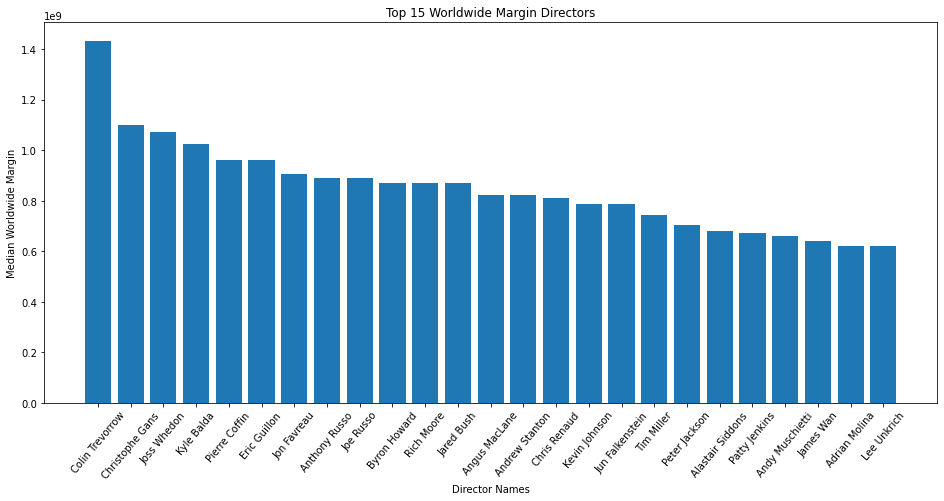

In [23]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.set(
    title = "Top 15 Worldwide Margin Directors", 
    xlabel = "Director Names",
    ylabel = "Median Worldwide Margin"
)


x = director_wwmargin_median['primary_name']
y = director_wwmargin_median['worldwide_margin']

ax.bar(x, y)
plt.xticks(rotation=50)
plt.rc('font', size = 10)
"";

In [24]:
def initial():


    name = input(movies_directors['']'Type your name and press ENTER. ')
    name_list = name.split()

    print(name_list)

    first = name_list[0][0]
    second = name_list[1][0]
    last = name_list[2][0]

    print(first.upper(),'.', second.upper(),'.', last.upper()) 


main()

SyntaxError: invalid syntax (<ipython-input-24-577d770a77d3>, line 4)

## Scatter plot of Budget vs WWMargin per movie
Showing movies that had a net loss in BLUE, and a net gain in RED.

The scatter plot shows a slight positive correlation for production budget and worldwide margin (return on investment) which supports that the more investment made the more return received.

margins
scatter
production budget vs gross profit
annotate the range 
bin the production budget (maybe)
after show a chart to talk about risk

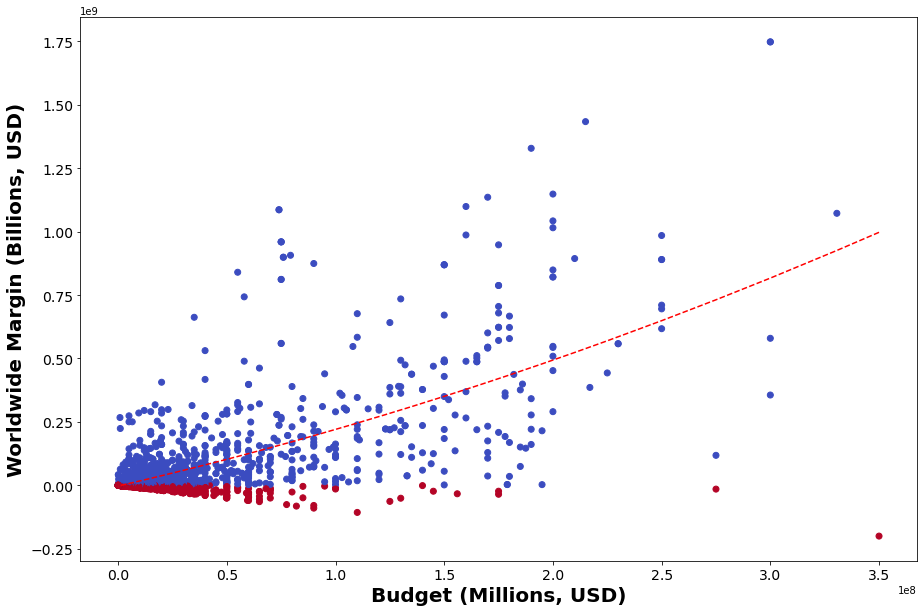

In [26]:
#ROI vs Production Budget scatter plot
fig, ax = plt.subplots(figsize=(15, 10))

#plt.title("Return on Investment vs Production Budget", fontsize = 20, weight='bold')
plt.xlabel("Budget (Millions, USD)", fontsize = 20, weight='bold')
plt.ylabel("Worldwide Margin (Billions, USD)", fontsize = 20, weight='bold')

x = movies_directors['production_budget']
y = movies_directors['worldwide_margin']

plt.scatter(x, y, c = np.sign(y), cmap=plt.cm.coolwarm.reversed())

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.show()

##r2 is .447 which makes trendline not significant

In [27]:
from sklearn.metrics import r2_score
print(r2_score)

<function r2_score at 0x7f98c02f8dc0>


NameError: name 'y_test' is not defined

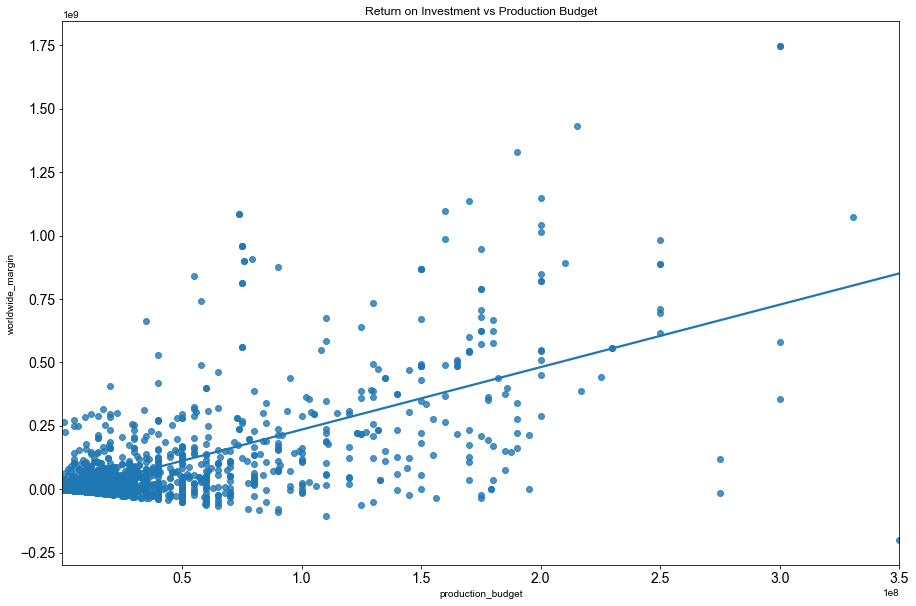

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set(
    title = ("Return on Investment vs Production Budget"), 
    xlabel = ("Budget (Millions of U.S. Dollars)"),
    ylabel = ("Return On Investment (Billions of U.S. Dollars)")
)

#plt.title("Return on Investment vs Production Budget", fontsize = 20, weight='bold')
#plt.xlabel("Budget (Millions of U.S. Dollars)", fontsize = 20, weight='bold')
#plt.ylabel("Worldwide Margin (Billions of U.S. Dollars)", fontsize = 20, weight='bold')

#x = movies_directors['production_budget']
#y = movies_directors['worldwide_margin']


sns.regplot(
    data=movies_directors,
    x='production_budget',
    y='worldwide_margin',
    ci=None,
)

sns.set(style='whitegrid', font_scale=1.5)

#df = pd.DataFrame({'x': movies_directors['production_budget'], 'y': movies_directors['worldwide_margin']})
#plt.scatter(df.x, df.y, c = np.sign(df.y), cmap=plt.cm.coolwarm)


plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
ax.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_predicted)), (0, 1))
plt.show()

In [29]:
https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

from sklearn.metrics import r2_score

plt.plot(x,y,"+", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

SyntaxError: invalid syntax (<ipython-input-29-14e008b557ea>, line 1)

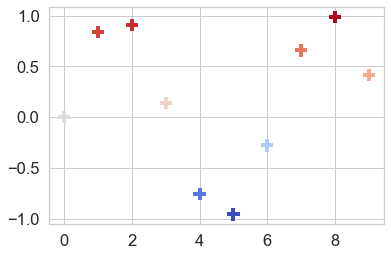

In [30]:
x = np.arange(10)
y = np.sin(x)

plt.scatter(x, y, marker='+', s=150, linewidths=4, c=y, cmap=plt.cm.coolwarm)
plt.show()

In [31]:
#trying to group production budget into 7 groups


In [33]:
movies_directors.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,foreign_gross,domestic_margin,worldwide_margin,foreign_margin,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name
0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,107000000,-307237650,-200237650,-243000000,Dark Phoenix,Dark Phoenix,2019,113.00,"Action,Adventure,Sci-Fi",nm1334526,Simon Kinberg
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,944008095,128405868,1072413963,613408095,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",nm0923736,Joss Whedon
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,1369318718,378815482,1748134200,1069318718,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,1369318718,378815482,1748134200,1069318718,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,426920914,-70975705,355945209,126920914,Justice League,Justice League,2017,120.00,"Action,Adventure,Fantasy",nm0811583,Zack Snyder


domestic vs foreign vs worldwide
might need to target both 
bar, or scatter

could groupby quantile 
f"25th Percentile: {np.percentile(data, 25)}"

In [34]:
foreign_gross_mean = movies_directors.groupby(['start_year'])['foreign_gross'].mean()

In [35]:
domestic_gross_mean = movies_directors.groupby(['start_year'])['domestic_gross'].mean()

In [ ]:
plt.figure(figsize=(10,7.5))

ax = sns.lineplot(
    x="year", y="gross", hue="domfor", style="domfor", palette="Set1", markers=True, dashes=False ,data=tsps
)
plt.legend(loc='upper left', labels=['Domestic', 'Foreign'], prop={'size': 20})

#plt.title('Domestic vs Foreign Box Office, 2010-2018')
plt.xlabel('Year')
plt.ylabel('Gross Box Office (Millions of US Dollars)')

#font_prop = font_manager.FontProperties(size=20)

for item in ([g1.title, g1.xaxis.label, g1.yaxis.label] +
             g1.get_xticklabels() + g1.get_yticklabels()):
    item.set_fontsize(20)

# plt.rc('legend', fontsize=20)
plt.savefig("1_Graph1DomFor1018.jpg")
plt.show(g1)

## Presentation
https://www.canva.com/design/DAFcoKlEQ0E/62vWavt46L7VwiBMaU1scg/edit